In [8]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb  # for graphical visualization

# Initialize the Bayesian Network
bn = gum.InfluenceDiagram()

# Add Nodes to the Network
medu = bn.add(gum.LabelizedVariable("Medu", "Mother's Education", 2))  # 0: No Higher Education, 1: Higher Education
fedu = bn.add(gum.LabelizedVariable("Fedu", "Father's Education", 2))  # 0: No Higher Education, 1: Higher Education
higher = bn.add(gum.LabelizedVariable("Higher", "Higher Education", 2))  # 0: No, 1: Yes
absences = bn.add(gum.LabelizedVariable("Absences", "Absences", 3))  # 0: Low, 1: Medium, 2: High
studytime = bn.add(gum.LabelizedVariable("StudyTime", "Study Time", 4))  # 0: Very Low, 1: Low, 2: Medium, 3: High
failures = bn.add(gum.LabelizedVariable("Failures", "Failures", 3))  # 0: 0, 1: 1, 2: More than 1
final_grade = bn.add(gum.LabelizedVariable("FinalGrade", "Final Grade", 2))  # 0: Fail, 1: Pass



# Add Decision Node (whether to give extra lessons or not)
intervention = bn.addDecisionNode(gum.LabelizedVariable("Intervention", "School Intervention", 2))  # 0: No, 1: Yes

# Add Utility Node
utility = bn.addUtilityNode("Utility")






# Add arcs (dependencies) as per the Bayesian network structure
bn.addArc(medu, higher)
bn.addArc(fedu, higher)
bn.addArc(higher, studytime)
bn.addArc(absences, failures)
bn.addArc(studytime, final_grade)
bn.addArc(failures, final_grade)


# Connect Decision Node and Chance Nodes to the Utility Node
bn.addArc(final_grade, utility)
bn.addArc(intervention, utility)




#BELOW ARE THE CPT TABLE ASSIGNMENTS

# Set CPT for Medu (Root node)
bn.cpt(medu)[0] = 0.7303543913713405
bn.cpt(medu)[1] = 0.2696456086286595

# Set CPT for Fedu (Root node)
bn.cpt(fedu)[0] = 0.802773497688752
bn.cpt(fedu)[1] = 0.19722650231124808

# Set CPT for Absences (Root node)
bn.cpt(absences)[0] = 0.7180277349768875  # Low
bn.cpt(absences)[1] = 0.24961479198767333  # Medium
bn.cpt(absences)[2] = 0.032357473035439135  # High

# Set CPT for Higher (Dependent on Medu and Fedu)
bn.cpt(higher)[0, 0] = [0.8480725623582767, 0.15192743764172337]  # Medu=0, Fedu=0
bn.cpt(higher)[0, 1] = [1.0, 0.0]  # Medu=0, Fedu=1
bn.cpt(higher)[1, 0] = [1.0, 0.0]  # Medu=1, Fedu=0
bn.cpt(higher)[1, 1] = [0.9789473684210527, 0.021052631578947368]  # Medu=1, Fedu=1

# Set CPT for Failures (Dependent on Absences)
bn.cpt(failures)[0] = [0.7142857142857143, 0.23809523809523808, 0.047619047619047616]  # Absences=Low
bn.cpt(failures)[1] = [0.869098712446352, 0.08798283261802575, 0.04291845493562232]  # Absences=Medium

# Set CPT for Study Time (Dependent on Higher)
bn.cpt(studytime)[0] = [0.6376811594202898, 0.2753623188405797, 0.057971014492753624, 0.028985507246376812]  # Higher=No
bn.cpt(studytime)[1] = [0.2896551724137931, 0.49310344827586206, 0.16034482758620688, 0.056896551724137934]  # Higher=Yes

# Set CPT for FinalGrade (Dependent on Failures and StudyTime)
bn.cpt(final_grade)[0, 0] = [0.147239263803681, 0.852760736196319]  # Failures=0, StudyTime=Very Low
bn.cpt(final_grade)[0, 1] = [0.08712121212121213, 0.9128787878787878]  # Failures=0, StudyTime=Low
bn.cpt(final_grade)[0, 2] = [0.033707865168539325, 0.9662921348314607]  # Failures=0, StudyTime=Medium
bn.cpt(final_grade)[0, 3] = [0.030303030303030304, 0.9696969696969697]  # Failures=0, StudyTime=High
bn.cpt(final_grade)[1, 0] = [0.5, 0.5]  # Failures=1, StudyTime=Very Low
bn.cpt(final_grade)[1, 1] = [0.34615384615384615, 0.6538461538461539]  # Failures=1, StudyTime=Low
bn.cpt(final_grade)[1, 2] = [0.6666666666666666, 0.3333333333333333]  # Failures=1, StudyTime=Medium
bn.cpt(final_grade)[1, 3] = [0.5, 0.5]  # Failures=1, StudyTime=High
bn.cpt(final_grade)[2, 0] = [0.6153846153846154, 0.38461538461538464]  # Failures=More than 1, StudyTime=Very Low
bn.cpt(final_grade)[2, 1] = [0.6, 0.4]  # Failures=More than 1, StudyTime=Low
bn.cpt(final_grade)[2, 2] = [0.0, 1.0]  # Failures=More than 1, StudyTime=Medium









# Define the utility table based on the utility functions provided in the file
#bn.utility("Utility").edit(2, 2)  # 2 states for FinalGrade, 2 states for Intervention

#Defining utility tables
bn.utility("Utility")[0, 1] = 70  # Not intervening, passing
bn.utility("Utility")[0, 0] = -30  # Not intervening, failing
bn.utility("Utility")[1, 1] = -15   # Intervening, passing
bn.utility("Utility")[1, 0] = 85  # Intervening, failing

# Print the structure of the network
print("Decision Network Structure:")
print(bn)











# Print the CPTs for each node
nodes = ['Medu', 'Fedu', 'Absences', 'Higher', 'Failures', 'StudyTime', 'FinalGrade']
for node in nodes:
    print(f"\nCPT of {node}:")
    print(bn.cpt(bn.idFromName(node)))

# Correct inference engine for influence diagrams
ie = gum.ShaferShenoyLIMIDInference(bn)

# Perform inference to predict Final Grade based on evidence
ie.setEvidence({
    'Medu': 0,  # Higher Education for Mother
    'Fedu': 0,  # Higher Education for Father
    'Absences' : 1,  # Yes to Higher Education
    'StudyTime': 0,  # Medium Study Time
    'Failures': 1  # One Failure
})



ie.makeInference()

print("\nPosterior distribution of FinalGrade:")
print(ie.posterior(bn.idFromName('FinalGrade')))

# Perform inference and get the optimal decision
optimal_decision = ie.optimalDecision("Intervention")
print(f"\nThe optimal decision is: {optimal_decision}")




Decision Network Structure:
Influence Diagram{
  chance: 7,
  utility: 1,
  decision: 1,
  arcs: 8,
  domainSize: 1152
}

CPT of Medu:

  Medu             |
0        |1        |
---------|---------|
 0.7304  | 0.2696  |


CPT of Fedu:

  Fedu             |
0        |1        |
---------|---------|
 0.8028  | 0.1972  |


CPT of Absences:

  Absences                   |
0        |1        |2        |
---------|---------|---------|
 0.7180  | 0.2496  | 0.0324  |


CPT of Higher:

             ||  Higher           |
Medu  |Fedu  ||0        |1        |
------|------||---------|---------|
0     |0     || 0.8481  | 0.1519  |
1     |0     || 1.0000  | 0.0000  |
0     |1     || 1.0000  | 0.0000  |
1     |1     || 0.9789  | 0.0211  |


CPT of Failures:

      ||  Failures                   |
Absenc||0        |1        |2        |
------||---------|---------|---------|
0     || 0.7143  | 0.2381  | 0.0476  |
1     || 0.8691  | 0.0880  | 0.0429  |
2     || 0.0000  | 0.0000  | 0.0000  |


CPT of Stu

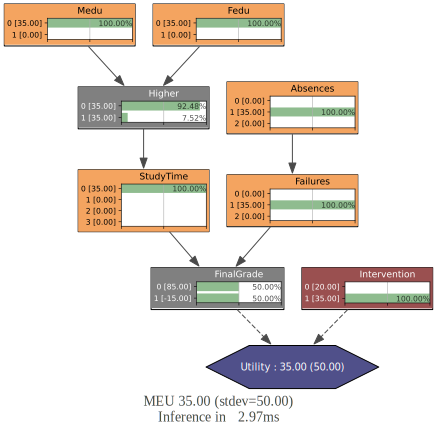

In [9]:
gnb.showInference(bn, evs={'Medu': 0, 'Fedu': 0, 'Absences': 1, 'StudyTime': 0, 'Failures': 1})
